# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Importing Data

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
sales_df = pd.read_csv(URL)
sales_df.head(10)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
5,6/30/1980,1980,Jun,1,105.55,0.75,23829.315,2573,5,20.298,-1.610947,2.9,754.5,Mediumfamilycar,Illinois
6,7/31/1980,1980,Jul,1,82.45,0.50,32896.064,2828,3,34.585,0.413098,2.9,729.6,Supperminicar,Illinois
7,8/31/1980,1980,Aug,1,98.76,0.25,28837.174,2917,3,55.650,0.378527,3.0,734.9,Supperminicar,New York
8,9/30/1980,1980,Sep,1,87.68,0.07,22652.628,1138,3,33.308,-0.670770,5.2,705.6,Smallfamiliycar,California
9,10/31/1980,1980,Oct,1,101.45,0.00,27712.800,4582,5,42.522,0.216688,4.4,609.7,Smallfamiliycar,New York


In [3]:
# Check for DataFrame columns
sales_df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [4]:
# Check for DataFrame columns types
sales_df.dtypes

Date                        object
Year                         int64
Month                       object
Recession                    int64
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object

In [5]:
# Generate descriptive statistics
sales_df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


# Creating Visualizations

### Line Chart: Yearly Fluctuations in Automobile Sales
This line chart is designed to provide a clear depiction of the annual fluctuations in automobile sales.

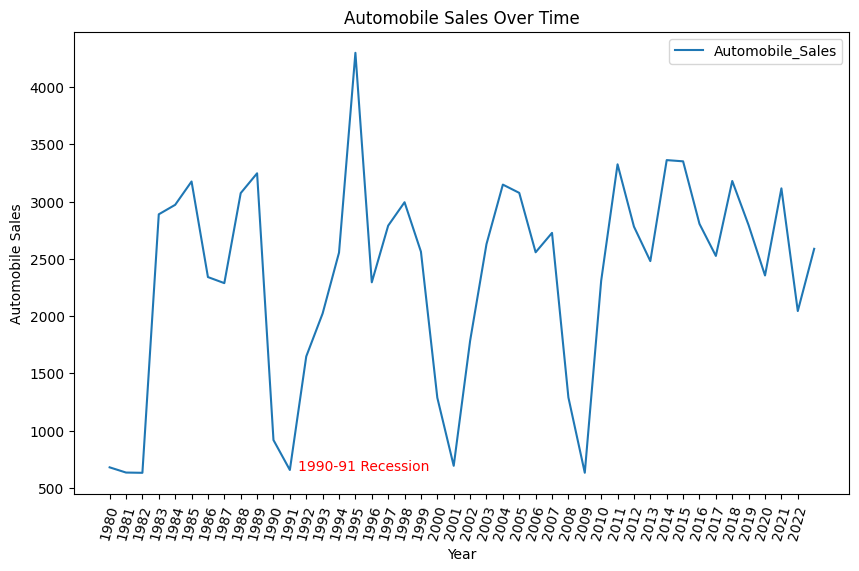

In [6]:
df_line = sales_df.groupby('Year')['Automobile_Sales'].mean()

plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')

min_year = sales_df['Year'].min()
max_year = sales_df['Year'].max()
plt.xticks(list(range(min_year, max_year)), rotation=75)

plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales Over Time')
plt.text(1991.5, 650, '1990-91 Recession', fontsize=10, color='red')
plt.legend()
plt.show()

### Multiple Line Chart: Comparing Vehicle Types During Recession

**Key Findings**

- During recession periods, it is evident that the sales of Sports vehicles experienced a noticeable decline. This can be attributed to their higher price point, which may make them less appealing during financially challenging times.
- In stark contrast, the sales of family vehicles exhibited an increase during the same recessionary period.

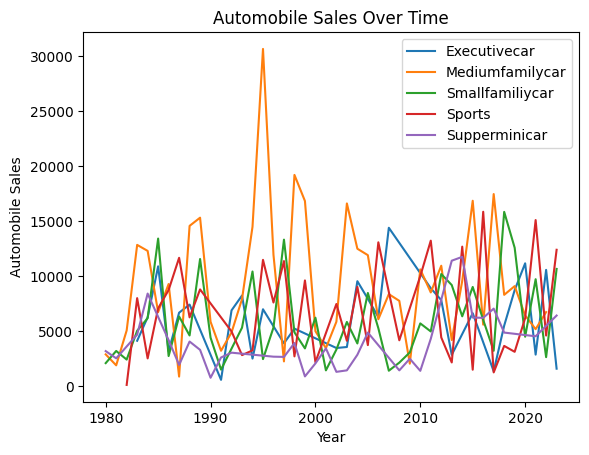

In [7]:
df_multi = sales_df.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_multi.set_index('Year', inplace=True)
df_multi = df_multi.groupby(['Vehicle_Type'])['Automobile_Sales']
df_multi.plot(kind='line')

plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales Over Time')
plt.legend()
plt.show()

### Comparing Sales Trend per Vehicle Type
This bar chart serves as a tool for comparing the sales trends of different vehicle types in two distinct economic periods: during a recession and in a non-recession period.

**Key Findings**
- There is a drastic decline in the overall sales
- The most affected type of vehicle is Sports


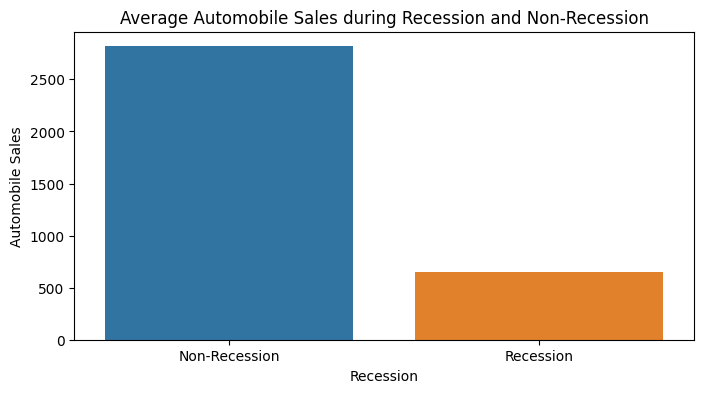

In [8]:
df_bar = sales_df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(8, 4))
sns.barplot(x='Recession', y='Automobile_Sales', data=df_bar)

plt.xlabel('Recession')
plt.ylabel('Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

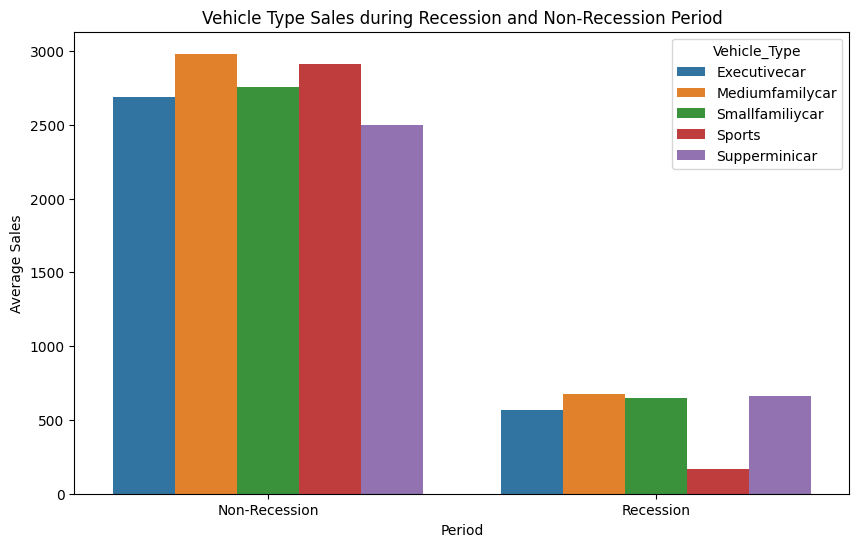

In [9]:
recession_data = sales_df[sales_df['Recession'] == 1]
df_bar = sales_df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=df_bar)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.title('Vehicle Type Sales during Recession and Non-Recession Period')

plt.show()

### Comparing Variations in GDP


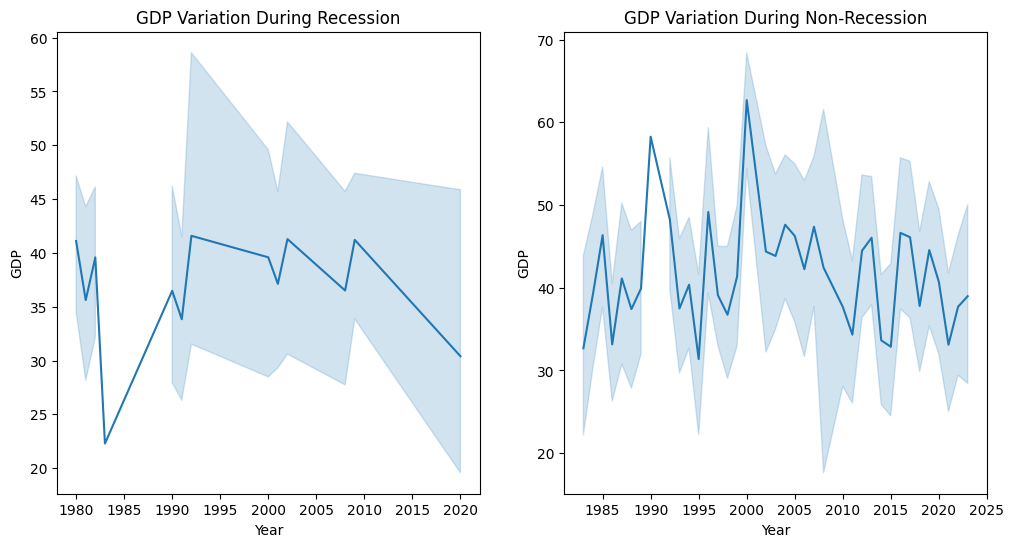

In [10]:
recession_data = sales_df[sales_df['Recession'] == 1]
non_recession_data = sales_df[sales_df['Recession'] == 0]

fig=plt.figure(figsize=(12, 6))

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

sns.lineplot(x='Year', y='GDP', data=recession_data, ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation During Recession')

sns.lineplot(x='Year', y='GDP', data=non_recession_data, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation During Non-Recession')

plt.show()

### Analysing the Impact of Seasonality on Sales
This bubble plot visually represents the influence of seasonality on sales throughout the months of a non-recession year
- Each bubble's size corresponds to the seasonality weight

**Key Findings**
- Seasonality has no effect on the overall sales
- There is a outlier sales value in April

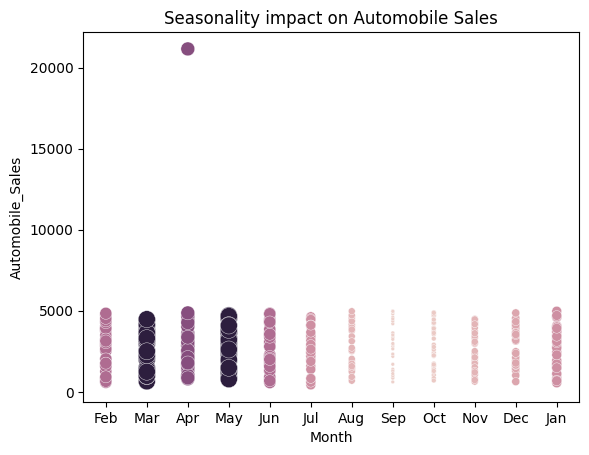

In [11]:
non_recession_data = sales_df[sales_df['Recession'] == 0]
size = non_recession_data['Seasonality_Weight'] * 100

sns.scatterplot(data = non_recession_data, x='Month', y='Automobile_Sales', s=size, hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

### Identifying the Correlation Between Vehicle Price and Sales
In this scatter plot, we aim to explore the potential correlation between average vehicle prices and sales during periods of recession. As it illustrates, there is a weak relationship between these two variables.

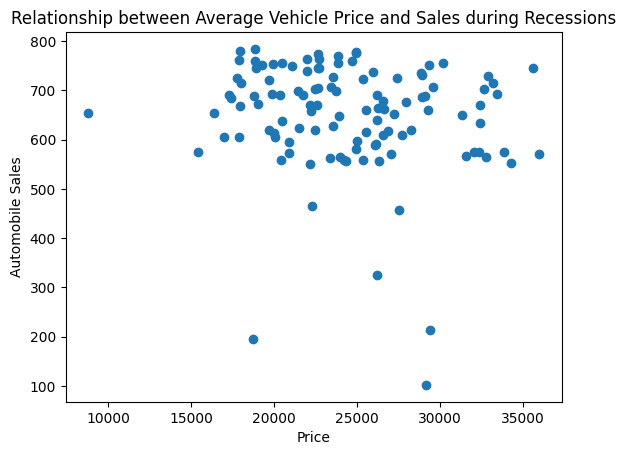

In [12]:
recession_data = sales_df[sales_df['Recession'] == 1]

plt.scatter(recession_data['Price'], recession_data['Automobile_Sales'])

plt.xlabel('Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

### Display the Portion of Advertising Expenditure
This pie chart provides a clear snapshot of how the company's advertising expenditure allocation has evolved during both recession and non-recession periods

**Key Findings**
- As anticipated, the company has significantly increased its advertising expenditure during non-recession periods

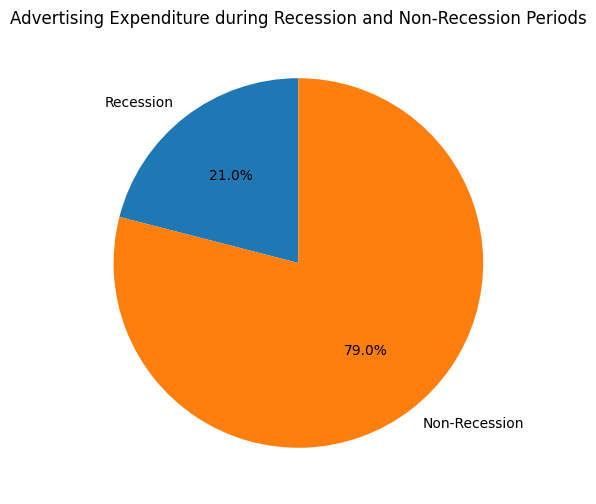

In [13]:
recession_data = sales_df[sales_df['Recession'] == 1]
non_recession_data = sales_df[sales_df['Recession'] == 0]

recession_ad_exp = recession_data['Advertising_Expenditure'].sum()
non_recession_ad_exp = non_recession_data['Advertising_Expenditure'].sum()

plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [recession_ad_exp, non_recession_ad_exp]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.show()

### Display the Total Advertisement Expenditure for Each Vehicle
This pie chart offers a concise overview of how the company allocated its advertising expenditure across various vehicle types during recession periods

**Key Findings**
- During recession the advertisements were mostly focused on low price range vehicles

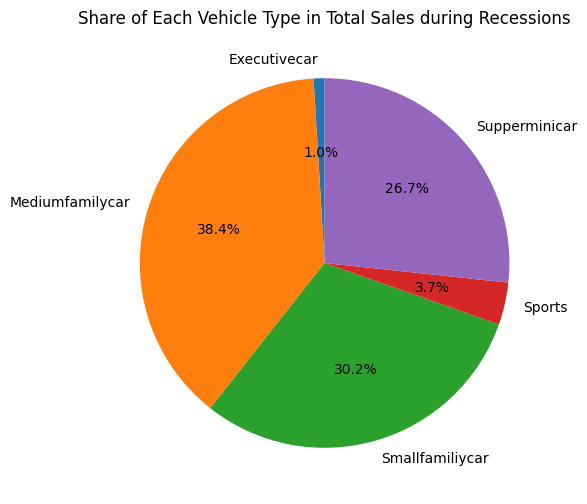

In [14]:
recession_data = sales_df[sales_df['Recession'] == 1]
recession_sal_vol = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

plt.figure(figsize=(8, 6))

labels = recession_sal_vol.index
sizes = recession_sal_vol.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Share of Each Vehicle Type in Total Sales during Recessions')

plt.show()

### Analyse the Effect of Unemployment Rate
In the following bar plot, we explore the influence of the unemployment rate on vehicle types and sales during the recession period

**Key Findings**
- During recession, buying pattern changed the sales of low range vehicle

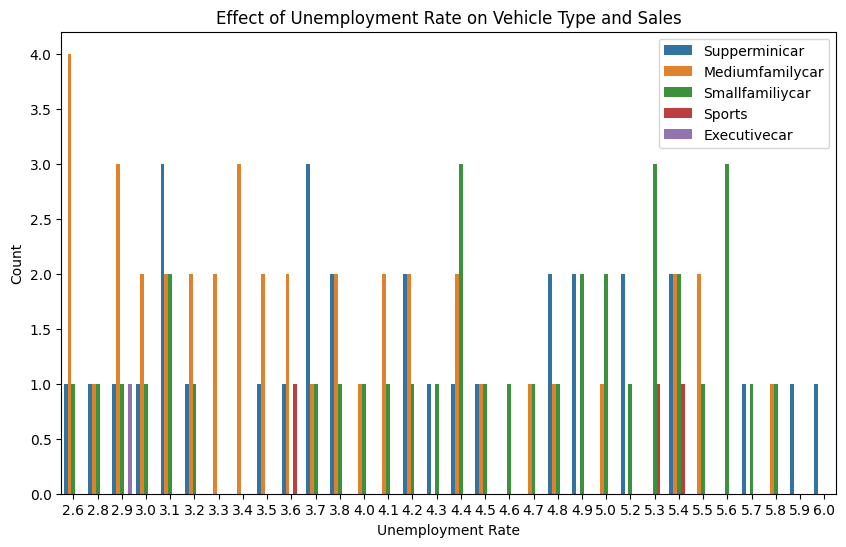

In [15]:
recession_data = sales_df[sales_df['Recession'] == 1]

plt.figure(figsize=(10, 6))

sns.countplot(data=recession_data, x='unemployment_rate', hue='Vehicle_Type')

plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc='upper right')
plt.show()